
# Customer Segmentation using RFM Analysis

### 1. Data Overview

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("data.csv",encoding='latin1')

# 1.1 Size of the dataset
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# 1.2 Description of each column
print("Description of each column:")
print(data.info())

# 1.3 Period covered by the dataset
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print(f"The data covers the period from {data['InvoiceDate'].min()} to {data['InvoiceDate'].max()}.")

The dataset contains 541909 rows and 8 columns.
Description of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
The data covers the period from 2010-12-01 08:26:00 to 2011-12-09 12:50:00.


In [2]:
print(data.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [3]:
df = data.dropna(subset = ['CustomerID'])
df = df[df['Quantity'] >= 0]
print(df.isnull().sum()) # Checking for null values again
df

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


- The size of the dataset in terms of the number of rows and columns is given
- A brief description of each column in the dataset is shown.
- The period covered by this dataset is mentioned

### 2. Customer Analysis

There are 4339 unique customers in the dataset.


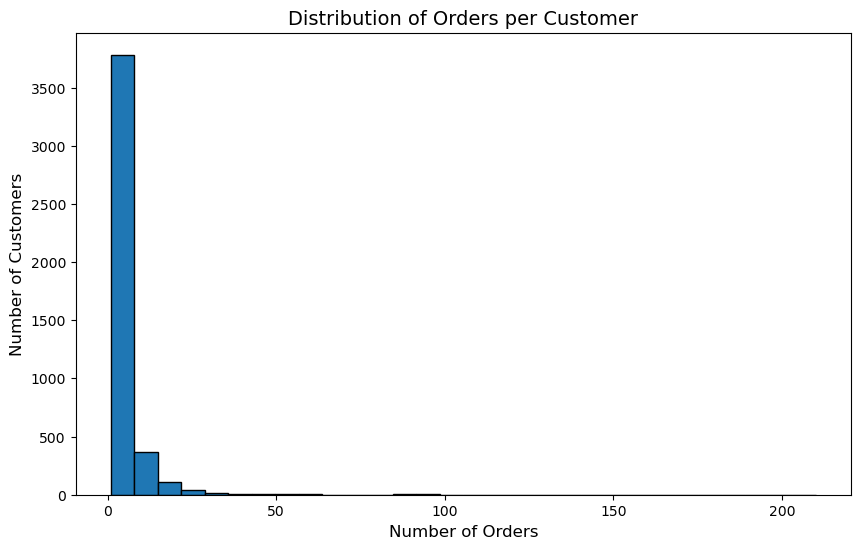

Top 5 customers by number of orders:
 CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
Name: InvoiceNo, dtype: int64


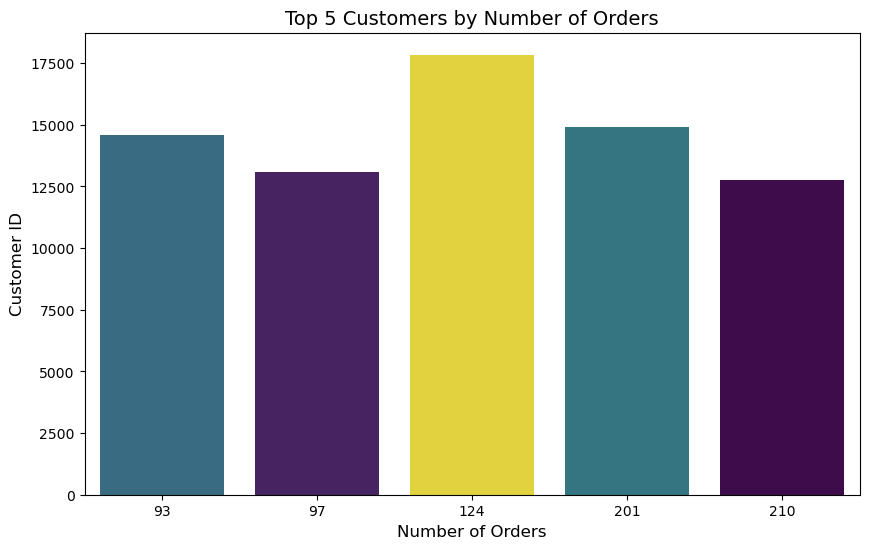

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

# 2.1 Number of unique customers
unique_customers = df['CustomerID'].nunique()
print(f"There are {unique_customers} unique customers in the dataset.")

# 2.2 Distribution of the number of orders per customer
order_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10, 6))
plt.hist(order_counts, bins=30, edgecolor='black')
plt.title("Distribution of Orders per Customer", fontsize=14)
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

# 2.3 Top 5 customers by order count
top_customers = order_counts.sort_values(ascending=False).head(5)
print("Top 5 customers by number of orders:\n", top_customers)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, hue=top_customers.index, palette='viridis', legend=False)
plt.title("Top 5 Customers by Number of Orders", fontsize=14)
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Customer ID", fontsize=12)
plt.show()

- There are 4372 unique customers in the dataset.
- The distribution of the number of orders per customer is visualized.
- The top 5 customers who have made the most purchases by order count are identified.

### 3. Product Analysis

In [5]:
# 3.1 Top 10 most frequently purchased products
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 most frequently purchased products:\n", top_products)

# 3.2 Average price of products
average_price = df['UnitPrice'].mean()
print(f"The average price of products is ${average_price:.2f}")

# 3.3 Product category with the highest revenue
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
revenue_by_product = df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).head(1)
print("Product category generating the highest revenue:\n", revenue_by_product)

Top 10 most frequently purchased products:
 StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64
The average price of products is $3.12
Product category generating the highest revenue:
 StockCode
23843    168469.6
Name: TotalPrice, dtype: float64


- The top 10 most frequently purchased products are shown.
- The average price of products in the dataset is calculated.
- The product category that generates the highest revenue is given

### 4. Time Analysis

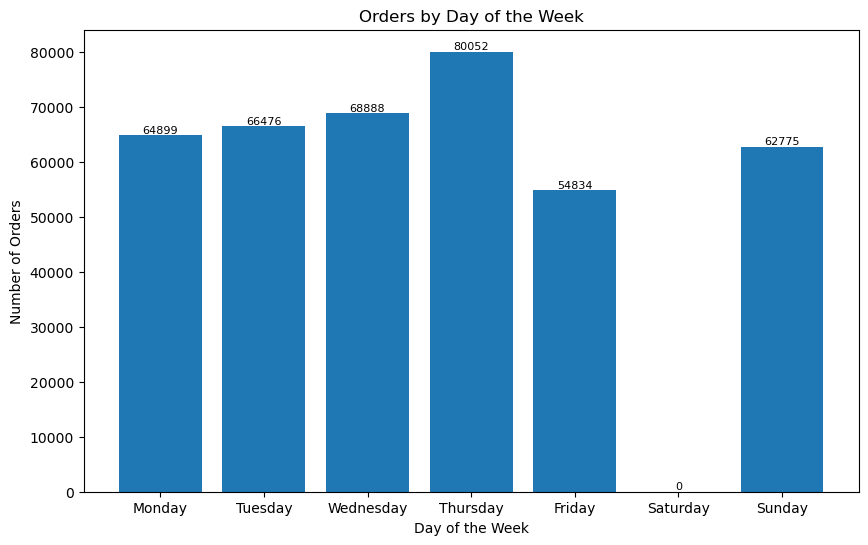

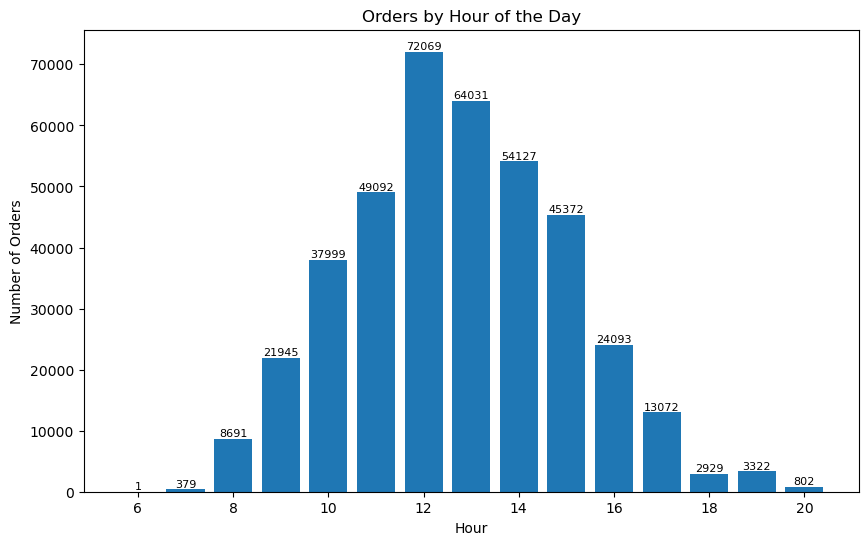

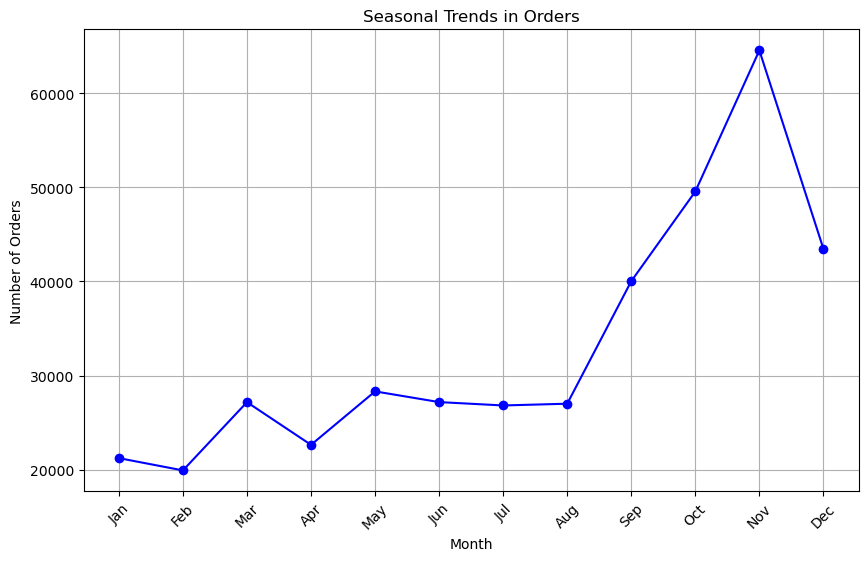

In [6]:
# 4.1 Orders per day of the week
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_by_day = df['DayOfWeek'].value_counts()
orders_by_day = orders_by_day.reindex(day_order).fillna(0)
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(orders_by_day.index, orders_by_day.values)
for bar in bars:
    height = bar.get_height()  # Get the height of the bar
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), 
            ha='center', va='bottom', fontsize=8)  # Position text at the top of the bar
ax.set_title("Orders by Day of the Week")
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Number of Orders")
plt.show()

# 4.2 Orders by time of day
df['Hour'] = df['InvoiceDate'].dt.hour
orders_by_hour = df['Hour'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(orders_by_hour.index, orders_by_hour.values)
for bar in bars:
    height = bar.get_height()  # Get the height of the bar
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), 
            ha='center', va='bottom', fontsize=8)  # Position text at the top of the bar
ax.set_title("Orders by Hour of the Day")
ax.set_xlabel("Hour")
ax.set_ylabel("Number of Orders")
plt.show()

# 4.3 Seasonal trends
df['Month'] = df['InvoiceDate'].dt.month
seasonal_trends = df.groupby('Month')['InvoiceNo'].count()
plt.figure(figsize=(10, 6))
plt.plot(seasonal_trends.index, seasonal_trends.values, marker='o', linestyle='-', color='b')
plt.title("Seasonal Trends in Orders")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(ticks=seasonal_trends.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()


### 5. Geographical Analysis

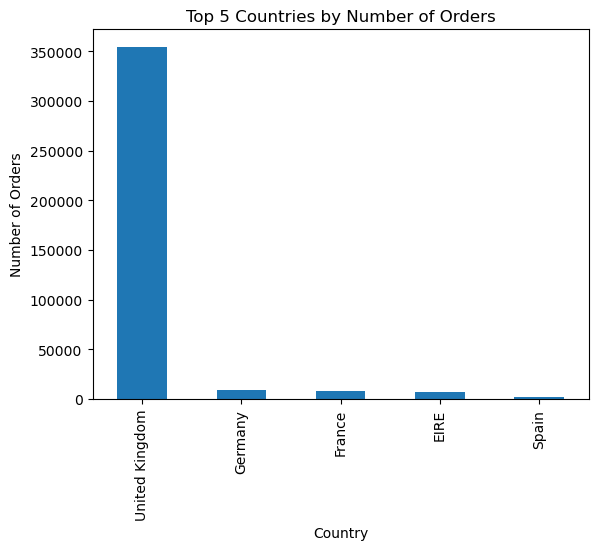

Top 5 countries by the number of orders:
 Country
United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: count, dtype: int64
Top 5 countries by average order value:
 Country
Netherlands    120.798282
Australia      116.895620
Japan          116.561900
Singapore       95.852658
Sweden          85.096075
Name: TotalPrice, dtype: float64


In [7]:
# 5.1 Top 5 countries by number of orders
top_countries = df['Country'].value_counts().head(5)
top_countries.plot(kind='bar')
plt.title("Top 5 Countries by Number of Orders")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.show()
print("Top 5 countries by the number of orders:\n",top_countries)

# 5.2 Average order value by country
revenue_by_country = df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False).head(5)
print("Top 5 countries by average order value:\n", revenue_by_country)


### 6. Payment Analysis

In [8]:
# 6.1 Common payment methods
if 'PaymentMethod' in df.columns:
    payment_methods = df['PaymentMethod'].value_counts()
    payment_methods.plot(kind='bar')
    plt.title("Common Payment Methods")
    plt.xlabel("Payment Method")
    plt.ylabel("Frequency")
    plt.show()

    # 6.2 Relationship between payment method and order amount
    payment_order_amount = df.groupby('PaymentMethod')['Tox`xtalPrice'].mean()
    print("Average order amount by payment method:\n", payment_order_amount)
else:
    print("Payment method data is not available.")


Payment method data is not available.


### 7. Customer Behavior

In [9]:
# 7.1 Customer active duration
df['FirstPurchase'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df['LastPurchase'] = df.groupby('CustomerID')['InvoiceDate'].transform('max')
customer_lifetime = (df['LastPurchase'] - df['FirstPurchase']).dt.days.mean()
print(f"On average, customers remain active for {customer_lifetime:.2f} days.")

On average, customers remain active for 239.53 days.


In [10]:
# 7.2 Customer segments based on purchase behaviour
# Calculating Recency, Frequency, and Monetary
current_date = df['InvoiceDate'].max()
current_date

#recency
recency = df.groupby('CustomerID')['InvoiceDate'].max()
recency = (current_date - recency).dt.days

# Frequency
frequency = df.groupby('CustomerID')['InvoiceDate'].nunique()

# Monetary
monetary = df.groupby('CustomerID')['TotalPrice'].sum()

In [11]:
# Combining the Recency, Frequency, and Monetary in one useable dataframe

rfm_df = pd.DataFrame({

    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})
rfm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
12352.0,35,8,2506.04
12353.0,203,1,89.00
12354.0,231,1,1079.40
12355.0,213,1,459.40


In [12]:
# Merging the values of 'InvoiceDate' in the rfm_df

rfm = pd.merge(rfm_df, df[['CustomerID','InvoiceDate']],on = 'CustomerID', how = 'inner')

rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,InvoiceDate
0,12346.0,325,1,77183.6,2011-01-18 10:01:00
1,12347.0,1,7,4310.0,2010-12-07 14:57:00
2,12347.0,1,7,4310.0,2010-12-07 14:57:00
3,12347.0,1,7,4310.0,2010-12-07 14:57:00
4,12347.0,1,7,4310.0,2010-12-07 14:57:00


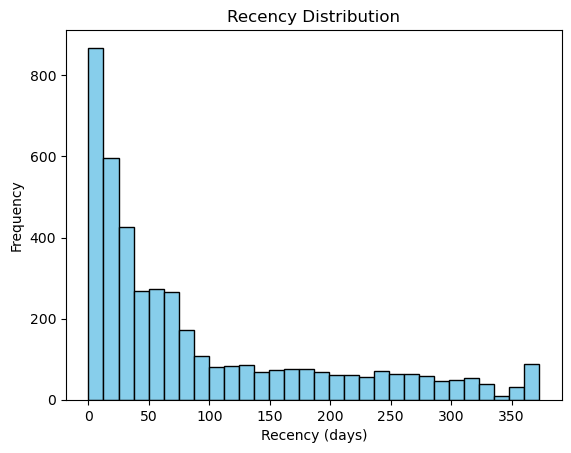

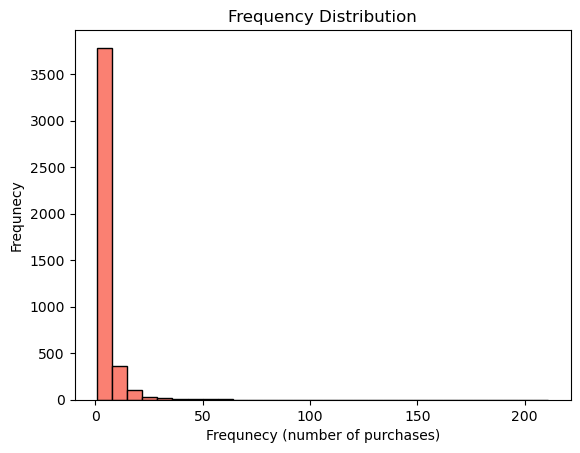

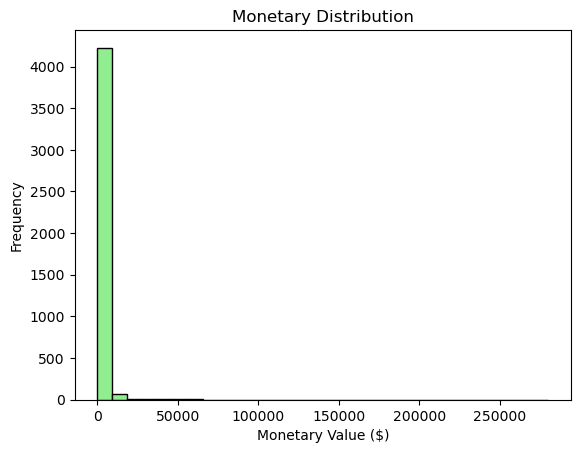

In [13]:
# Visualising the RFM data
# Plotting a histogram for Recency

plt.hist(rfm_df['Recency'], bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

# Plotting a histogram for Frequency

plt.hist(rfm_df['Frequency'], bins = 30, color = 'salmon', edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequnecy (number of purchases)')
plt.ylabel('Frequnecy')
plt.show()

# Plotting a histogram for Monetary
plt.hist(rfm_df['Monetary'], bins = 30, color = 'lightgreen', edgecolor = 'black')
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value ($)')
plt.ylabel('Frequency')
plt.show()

            Recency  Frequency  Monetary
Recency    1.000000  -0.260285 -0.122046
Frequency -0.260285   1.000000  0.550013
Monetary  -0.122046   0.550013  1.000000


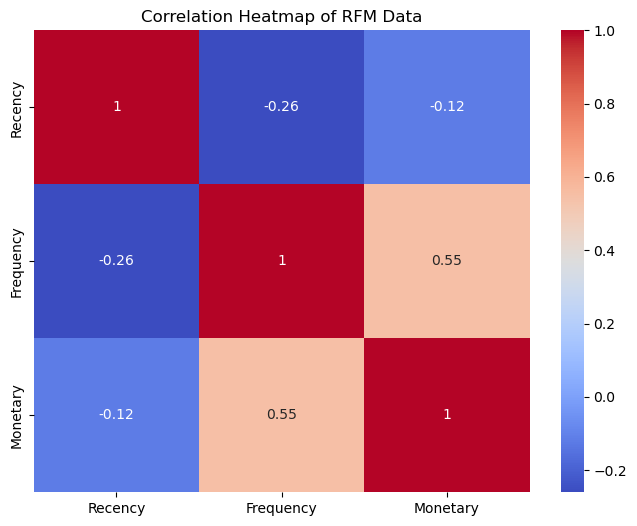

In [14]:
# Ploting a Heatmap, to visualise the correlation between the RFM variables

rfm_corr = rfm_df[['Recency', 'Frequency','Monetary']].corr()

print(rfm_corr)
# Creating the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(rfm_corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of RFM Data')
plt.show()

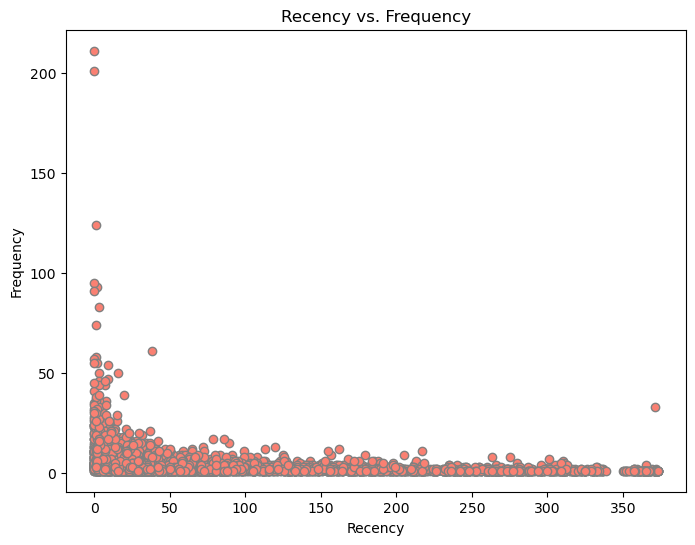

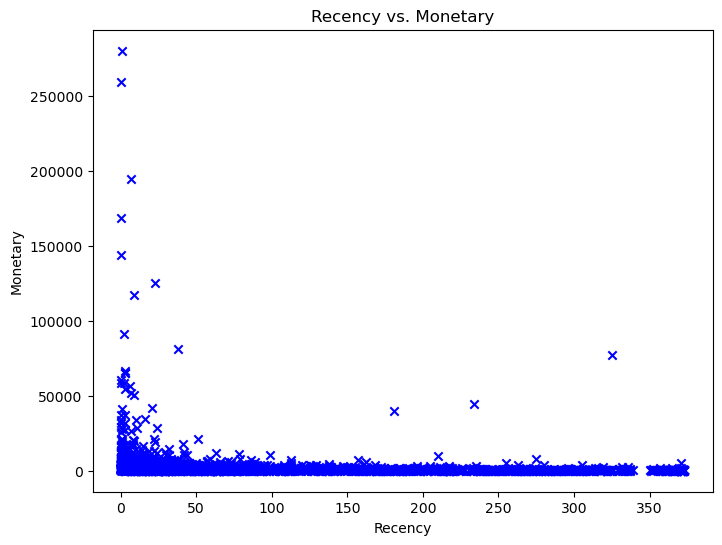

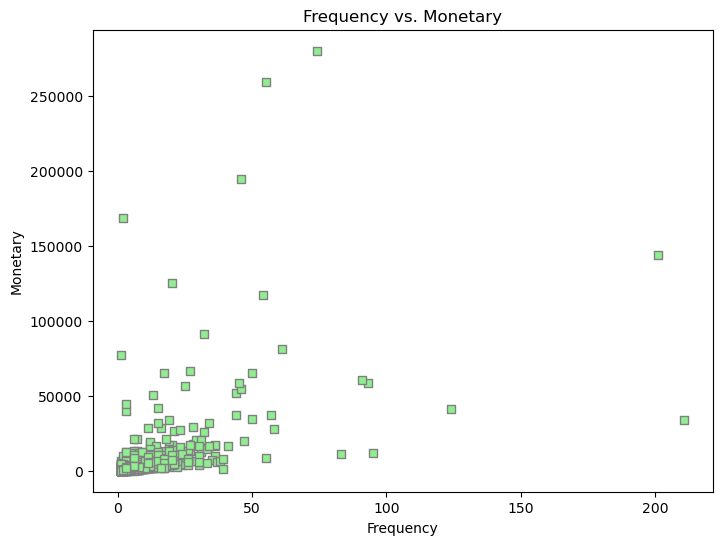

In [15]:
# Scatter plot
# R vs. F
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Recency'], rfm_df['Frequency'], color = 'salmon', marker = 'o', edgecolor='gray')
plt.title('Recency vs. Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# R vs. M
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Recency'], rfm_df['Monetary'], color = 'blue', marker = 'x')
plt.title('Recency vs. Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

# F vs. M
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Frequency'], rfm_df['Monetary'], color = 'lightgreen', marker = 's', edgecolor='gray')
plt.title('Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

In [16]:
# Calculating the Customer Scores

rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], 5, labels=[1, 2, 3, 4],duplicates='drop')  
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])  
# Combining the scores into one RFM score
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

In [17]:
rfm_df.describe()
print(rfm_df['RFMScore'].dtype)

object


In [18]:
#Converting the RFMScore Column to int
rfm_df['RFMScore'] = pd.to_numeric(rfm_df['RFMScore'])
print(rfm_df['RFMScore'].dtype)
rfm_df.head(10)

int64


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12347.0,1,7,4310.00,5,4,5,545
12348.0,74,4,1797.24,2,3,4,234
12349.0,18,1,1757.55,4,1,4,414
12350.0,309,1,334.40,1,1,2,112
12352.0,35,8,2506.04,3,4,5,345
12353.0,203,1,89.00,1,1,1,111
12354.0,231,1,1079.40,1,1,4,114
12355.0,213,1,459.40,1,1,2,112


Outliers detected based on IQR method:
            Recency  Frequency  Monetary RecencyScore FrequencyScore  \
CustomerID                                                             
12346.0         325          1  77183.60            1              1   
12347.0           1          7   4310.00            5              4   
12357.0          32          1   6207.67            4              1   
12359.0          57          4   6372.58            3              3   
12362.0           2         10   5226.23            5              4   
...             ...        ...       ...          ...            ...   
18229.0          11         20   7276.90            5              4   
18241.0           9         17   2073.09            5              4   
18251.0          86          1   4314.72            2              1   
18269.0         365          1    168.60            1              1   
18283.0           3         16   2094.88            5              4   

           MonetaryScore

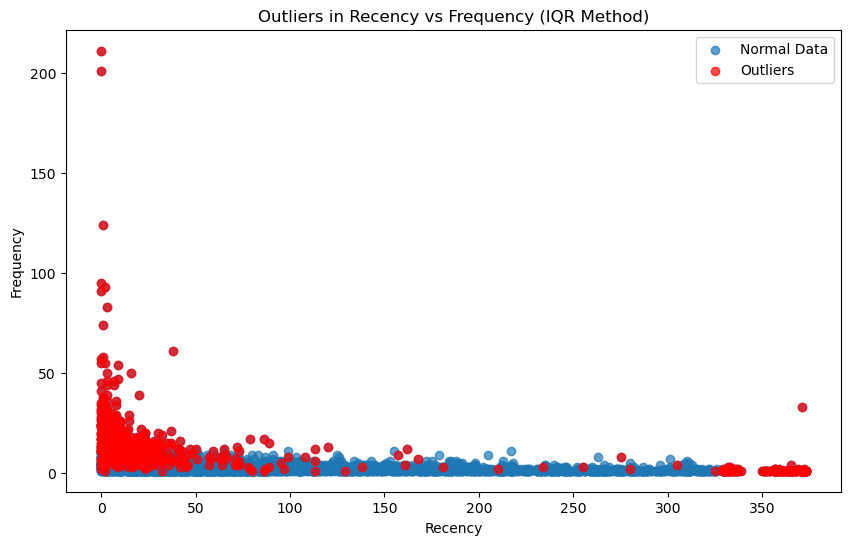

In [19]:
# Outliers
# Calculate IQR for each feature
Q1 = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(0.25)
Q3 = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(0.75)
IQR = Q3 - Q1

# Outlier detection: any value outside of (Q1 - 1.5*IQR) or (Q3 + 1.5*IQR)
outliers_iqr = rfm_df[((rfm_df[['Recency', 'Frequency', 'Monetary']] < (Q1 - 1.5 * IQR)) | 
                      (rfm_df[['Recency', 'Frequency', 'Monetary']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Show the outliers
print("Outliers detected based on IQR method:")
print(outliers_iqr)

# Plotting the outliers
plt.figure(figsize=(10, 6))
plt.scatter(rfm_df['Recency'], rfm_df['Frequency'], label='Normal Data', alpha=0.7)
plt.scatter(outliers_iqr['Recency'], outliers_iqr['Frequency'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Outliers in Recency vs Frequency (IQR Method)')
plt.legend()
plt.show()

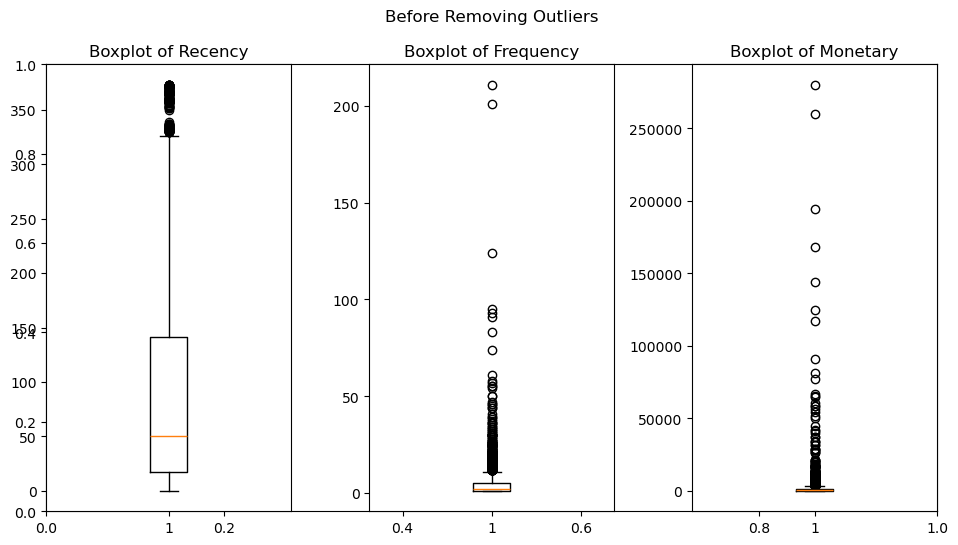

In [20]:
# Boxplot to visualize outliers

plt.figure(figsize=(10, 6))
plt.title("Before Removing Outliers\n\n")
plt.subplot(1, 3, 1)
plt.boxplot(rfm_df['Recency'])
plt.title('Boxplot of Recency')

plt.subplot(1, 3, 2)
plt.boxplot(rfm_df['Frequency'])
plt.title('Boxplot of Frequency')

plt.subplot(1, 3, 3)
plt.boxplot(rfm_df['Monetary'])
plt.title('Boxplot of Monetary')

plt.tight_layout()
plt.show()


In [21]:
# Calculate IQR for each feature
Q1 = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(0.25)
Q3 = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers based on IQR: any value outside of (Q1 - 1.5*IQR) or (Q3 + 1.5*IQR)
rfm_df_no_outliers_iqr = rfm_df[~((rfm_df[['Recency', 'Frequency', 'Monetary']] < (Q1 - 1.5 * IQR)) | 
                                  (rfm_df[['Recency', 'Frequency', 'Monetary']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the data before and after removing outliers
print(f"Original dataset size: {rfm_df.shape}")
print(f"Dataset size after removing outliers using IQR: {rfm_df_no_outliers_iqr.shape}")

Original dataset size: (4339, 7)
Dataset size after removing outliers using IQR: (3714, 7)


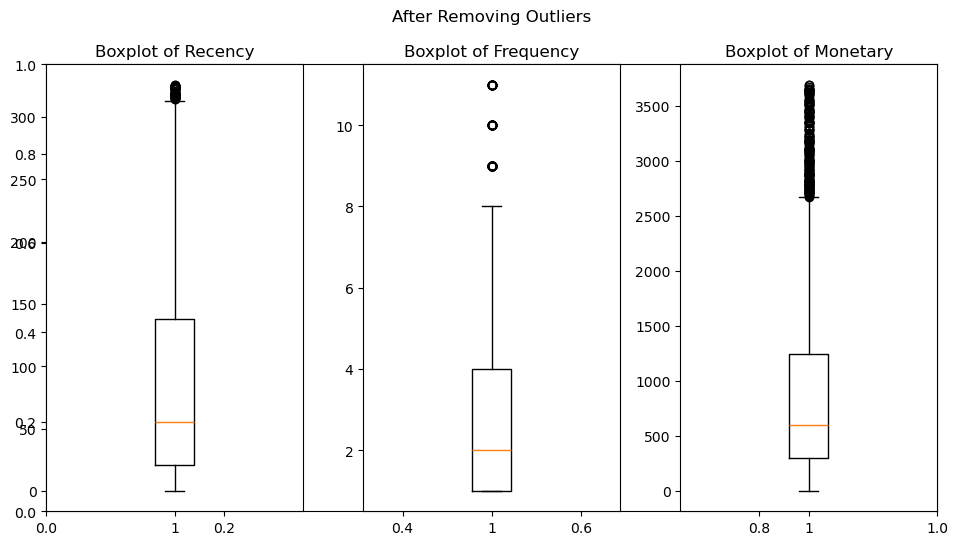

In [22]:
# Boxplot to visualize outliers after removal
plt.figure(figsize=(10, 6))
plt.title("After Removing Outliers\n\n")
# Recency Boxplot
plt.subplot(1, 3, 1)
plt.boxplot(rfm_df_no_outliers_iqr['Recency'])
plt.title('Boxplot of Recency')

# Frequency Boxplot
plt.subplot(1, 3, 2)
plt.boxplot(rfm_df_no_outliers_iqr['Frequency'])
plt.title('Boxplot of Frequency')

# Monetary Boxplot
plt.subplot(1, 3, 3)
plt.boxplot(rfm_df_no_outliers_iqr['Monetary'])
plt.title('Boxplot of Monetary')

plt.tight_layout()
plt.show()

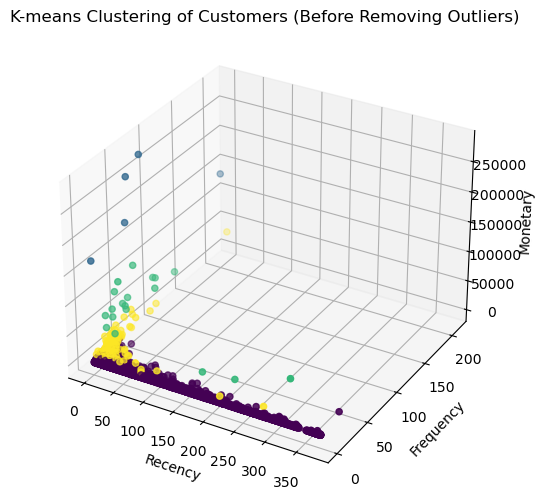

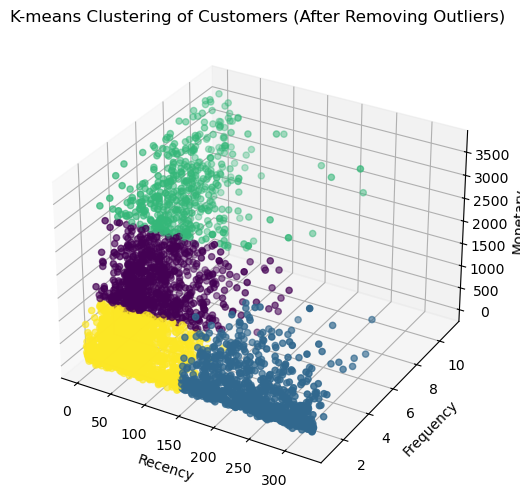

            Recency  Frequency  Monetary RecencyScore FrequencyScore  \
CustomerID                                                             
12348.0          74          4   1797.24            2              3   
12349.0          18          1   1757.55            4              1   
12350.0         309          1    334.40            1              1   
12352.0          35          8   2506.04            3              4   
12353.0         203          1     89.00            1              1   

           MonetaryScore  RFMScore  Cluster              Segment  
CustomerID                                                        
12348.0                4       234        0              At Risk  
12349.0                4       414        0      Loyal Customers  
12350.0                2       112        1       Lost Customers  
12352.0                5       345        2  Potential Loyalists  
12353.0                1       111        1       Lost Customers  
Cluster Centers (Centroids

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Prepare the data for clustering (Recency, Frequency, Monetary) after removing outliers
rfm_data_no_outliers = rfm_df_no_outliers_iqr[['Recency', 'Frequency', 'Monetary']] 

# Scale the data (important for K-means)
scaler = StandardScaler()
rfm_scaled_no_outliers = scaler.fit_transform(rfm_data_no_outliers)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters
rfm_df['Cluster']=kmeans.fit_predict(rfm_df)
rfm_df_no_outliers_iqr['Cluster'] = kmeans.fit_predict(rfm_scaled_no_outliers)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'], c=rfm_df['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-means Clustering of Customers (Before Removing Outliers)')
plt.show()

# Plotting the clusters for 3D visualization (using Recency, Frequency, and Monetary)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_df_no_outliers_iqr['Recency'], rfm_df_no_outliers_iqr['Frequency'], rfm_df_no_outliers_iqr['Monetary'], 
           c=rfm_df_no_outliers_iqr['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-means Clustering of Customers (After Removing Outliers)')
plt.show()

# Map Customer Segments Based on RFM Score
def segment_customer_based_on_rfm_score(row):
    if row['RFMScore'] >= 500:
        return 'Champions'
    elif 400 <= row['RFMScore'] < 500:
        return 'Loyal Customers'
    elif 300 <= row['RFMScore'] < 400:
        return 'Potential Loyalists'
    elif 200 <= row['RFMScore'] < 300:
        return 'At Risk'
    else:
        return 'Lost Customers'

# Apply segmentation logic after clustering (or you can apply before clustering as well)
rfm_df_no_outliers_iqr['Segment'] = rfm_df_no_outliers_iqr.apply(segment_customer_based_on_rfm_score, axis=1)

# View the result
print(rfm_df_no_outliers_iqr.head())

# Check cluster centers (optional)
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

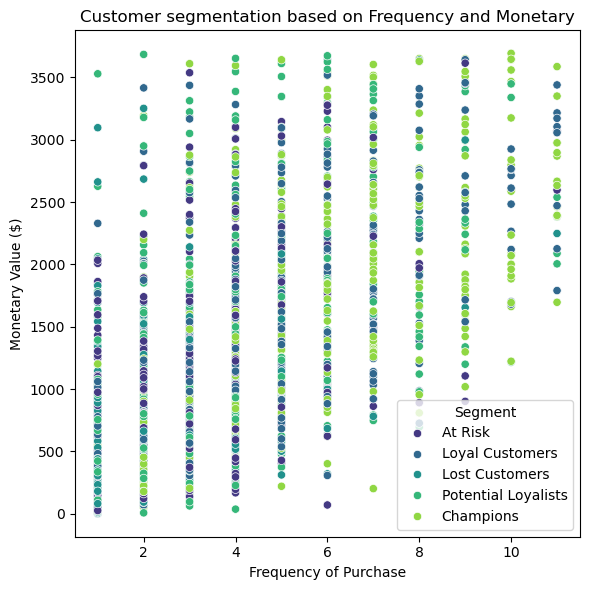

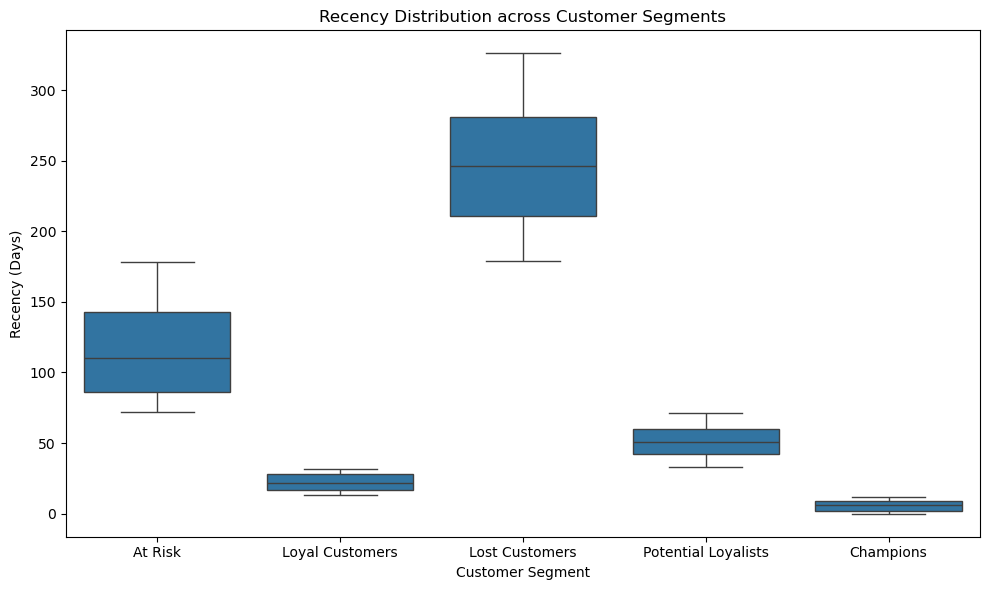

In [27]:
# Visualising the segments
plt.figure(figsize=(6,6))
# Scatter plot of Frequecy vs. Monetary, colored by segment
sns.scatterplot(x = 'Frequency', y='Monetary', hue = 'Segment', data =rfm_df_no_outliers_iqr, palette='viridis')
plt.title('Customer segmentation based on Frequency and Monetary')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Monetary Value ($)')
plt.tight_layout()
plt.show()

# Plot distribution of Recency scores across segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Recency', data=rfm_df_no_outliers_iqr)
plt.title('Recency Distribution across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Recency (Days)')
plt.tight_layout()
plt.show()

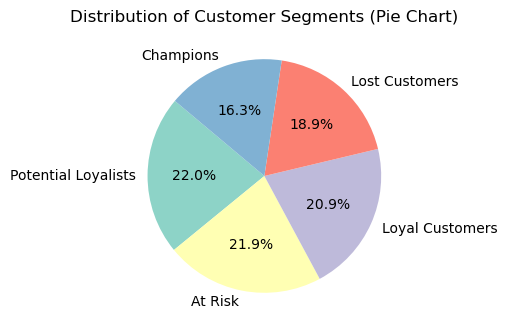

In [28]:
# Pie Chart of cutomer segments
segment_counts = rfm_df_no_outliers_iqr['Segment'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Distribution of Customer Segments (Pie Chart)')
plt.tight_layout()
plt.show()

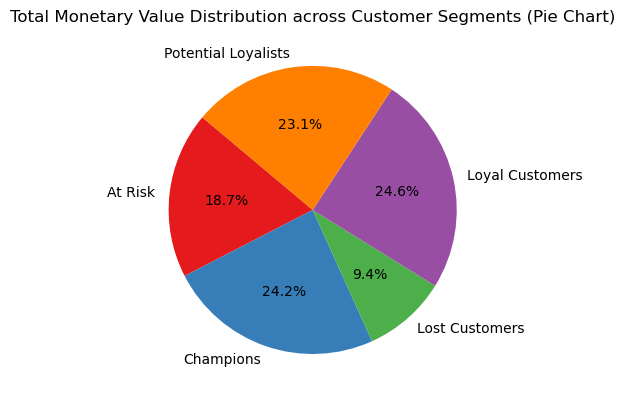

In [30]:
#Pie chart showing the distribution of the cutomer segments based on monetary expenditure

monetary_per_segment = rfm_df_no_outliers_iqr.groupby('Segment')['Monetary'].sum()
plt.figure(figsize=(5, 5))
plt.pie(monetary_per_segment, labels=monetary_per_segment.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'))
plt.title('Total Monetary Value Distribution across Customer Segments (Pie Chart)')
plt.tight_layout()
plt.show()

### 8. Returns and Refunds

In [31]:
# 8.1 Percentage of orders with returns
if 'Order ID' in df.columns and 'Return Status' in df.columns:
    total_orders = df['Order ID'].nunique()
    returns = df[df['Return Status'] == 'Returned']['Order ID'].nunique()
    return_percentage = (returns / total_orders) * 100
    print(f"Percentage of orders with returns: {return_percentage:.2f}%")
else:
    print("Columns 'Order ID' or 'Return Status' are missing.")

# 8.2 Correlation between product category and returns
if 'Product Category' in df.columns and 'Return Status' in df.columns:
    category_returns = df[df['Return Status'] == 'Returned'].groupby('Product Category').size()
    total_category = df.groupby('Product Category').size()
    return_correlation = (category_returns / total_category).sort_values(ascending=False)
    print("\nLikelihood of returns per product category:")
    print(return_correlation)
else:
    print("Columns 'Product Category' or 'Return Status' are missing.")


Columns 'Order ID' or 'Return Status' are missing.
Columns 'Product Category' or 'Return Status' are missing.


### 9. Profitability Analysis

In [32]:
# 9.1 Total profit during the dataset's period
if 'Revenue' in df.columns and 'Cost' in df.columns:
    df['Profit'] = df['Revenue'] - df['Cost']
    total_profit = df['Profit'].sum()
    print(f"Total profit: ${total_profit:.2f}")
else:
    print("Columns 'Revenue' or 'Cost' are missing.")

# 9.2 Top 5 products with the highest profit margins
if 'Product Name' in df.columns and 'Revenue' in df.columns and 'Cost' in df.columns:
    df['Profit Margin'] = (df['Revenue'] - df['Cost']) / df['Revenue']
    top_products = df.groupby('Product Name')['Profit Margin'].mean().sort_values(ascending=False).head(5)
    print("\nTop 5 products with the highest profit margins:")
    print(top_products)
else:
    print("Columns 'Product Name', 'Revenue', or 'Cost' are missing.")

Columns 'Revenue' or 'Cost' are missing.
Columns 'Product Name', 'Revenue', or 'Cost' are missing.


### 10. Customer Satisfaction

In [33]:
if 'Customer Feedback' in df.columns:
    print("Feedback data is available for analysis.")
    df['Sentiment'] = df['Customer Feedback'].str.contains('good|great|excellent|happy|love', case=False).fillna(False).astype(int)
    print(f"Average sentiment score: {df['Sentiment'].mean():.2f}")
else:
    print("No feedback data is available.")

No feedback data is available.
